In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
unclean_df = pd.read_excel('sqf-2018.xlsx')

In [4]:
unclean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11008 entries, 0 to 11007
Data columns (total 83 columns):
STOP_FRISK_ID                                                   11008 non-null int64
STOP_FRISK_DATE                                                 11008 non-null datetime64[ns]
Stop Frisk Time                                                 11006 non-null object
YEAR2                                                           11008 non-null int64
MONTH2                                                          11008 non-null object
DAY2                                                            11008 non-null object
STOP_WAS_INITIATED                                              11008 non-null object
RECORD_STATUS_CODE                                              11008 non-null object
ISSUING_OFFICER_RANK                                            11008 non-null object
ISSUING_OFFICER_COMMAND_CODE                                    11008 non-null int64
SUPERVISING_OFFICER_RANK  

In [5]:
unclean_df.describe()

,STOP_FRISK_ID,YEAR2,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_COMMAND_CODE,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,STOP_LOCATION_PRECINCT,STOP_LOCATION_X,STOP_LOCATION_Y
count,11008.000000,11008.0,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,1.100800e+04,11008.000000
mean,5504.500000,2018.0,183.268350,184.168241,21.647075,11.583757,60.983739,1.004989e+06,207880.290425
std,3177.880216,0.0,268.829442,268.496744,989.025666,19.137491,32.838054,1.918311e+04,29819.550356
min,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.000000,9.148030e+05,122284.000000
25%,2752.750000,2018.0,43.000000,43.000000,1.000000,5.000000,34.000000,9.947050e+05,184335.000000
50%,5504.500000,2018.0,73.000000,75.000000,1.000000,8.000000,62.000000,1.003550e+06,207011.000000
75%,8256.250000,2018.0,113.000000,113.000000,2.000000,15.000000,83.000000,1.014981e+06,235551.000000
max,11008.000000,2018.0,879.000000,881.000000,99999.000000,999.000000,123.000000,1.065899e+06,271349.000000


In [6]:
unclean_df.head()

,STOP_FRISK_ID,STOP_FRISK_DATE,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,2018-01-01,19:04:00,2018,January,Monday,Based on C/W on Scene,APP,POM,1,...,G,(null),VARICK STREET && FRANKLIN STREET,(null),VARICK STREET,982327,201274,(null),PBMS,MANHATTAN
1,2,2018-01-01,23:00:00,2018,January,Monday,Based on Radio Run,APP,POM,34,...,C,(null),DYCKMAN STREET && POST AVENUE,(null),DYCKMAN STREET,1004892,253548,(null),PBMN,MANHATTAN
2,3,2018-01-01,23:55:00,2018,January,Monday,Based on Radio Run,APP,POM,808,...,B,4M,2245 RANDALL AVENUE,(null),RANDALL AVENUE,1026706,237776,(null),PBBX,BRONX
3,4,2018-01-01,03:23:00,2018,January,Monday,Based on Radio Run,APP,POM,63,...,B,(null),EAST 38 STREET && AVENUE L,(null),EAST 38 STREET,1001347,166195,(null),PBBS,BROOKLYN
4,5,2018-01-01,03:23:00,2018,January,Monday,Based on Radio Run,APP,POM,63,...,B,(null),EAST 38 STREET && AVENUE L,(null),EAST 38 STREET,1001347,166195,(null),PBBS,BROOKLYN


In [8]:
unclean_df.MONTH2.value_counts()

March        1057
May          1039
August        979
September     937
July          928
January       923
April         912
June          912
October       880
February      860
November      803
December      778
Name: MONTH2, dtype: int64

In [9]:
unclean_df.DAY2.value_counts()

Saturday     1767
Wednesday    1708
Thursday     1614
Tuesday      1586
Friday       1577
Sunday       1435
Monday       1321
Name: DAY2, dtype: int64

In [10]:
unclean_df.STOP_WAS_INITIATED.value_counts()

Based on Radio Run         6375
Based on Self Initiated    2896
Based on C/W on Scene      1737
Name: STOP_WAS_INITIATED, dtype: int64

In [12]:
unclean_df.RECORD_STATUS_CODE.value_counts() # not useful

APP    11008
Name: RECORD_STATUS_CODE, dtype: int64

In [11]:
unclean_df.ISSUING_OFFICER_RANK.value_counts() # non-random since fewer higher rank

POM    9251
POF    1225
DTS     183
SGT     177
DT3      86
LT       51
DT2      15
SSA       6
SDS       4
LSA       3
CPT       3
DT1       2
DI        1
INS       1
Name: ISSUING_OFFICER_RANK, dtype: int64

In [13]:
unclean_df.SUPERVISING_OFFICER_RANK.value_counts()

SGT    8967
LT     1687
SSA     196
LSA      59
POM      34
CPT      27
SDS      16
POF       9
LCD       9
DI        4
Name: SUPERVISING_OFFICER_RANK, dtype: int64

In [14]:
unclean_df.JURISDICTION_CODE.value_counts()

P         6035
(null)    3265
H         1261
T          401
A           46
Name: JURISDICTION_CODE, dtype: int64

In [47]:
unclean_df.JURISDICTION_DESCRIPTION.value_counts() # clearer version of jurisdiction code
# (null) is not perceived as a NaN, no need to encode as new string

PSB                           6035
(null)                        3265
Housing                       1261
Transit                        401
Trespass Affifavit Program      46
Name: JURISDICTION_DESCRIPTION, dtype: int64

In [17]:
unclean_df.OBSERVED_DURATION_MINUTES.value_counts()

1       6680
0       1317
2       1315
5        644
3        377
        ... 
1259       1
59         1
1730       1
1450       1
1539       1
Name: OBSERVED_DURATION_MINUTES, Length: 75, dtype: int64

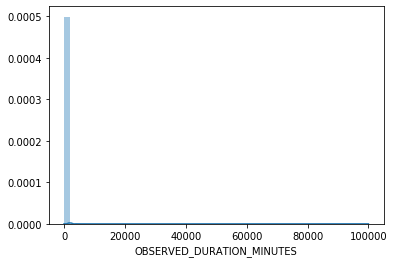

In [18]:
sns.distplot(unclean_df.OBSERVED_DURATION_MINUTES) # horribly skewed

In [20]:
unclean_df.SUSPECTED_CRIME_DESCRIPTION.value_counts() # very sparse in some categories, may be correlated with SUBJECT_ARREST_OFFENSE

CPW                                            2962
ROBBERY                                        1605
ASSAULT                                        1485
PETIT LARCENY                                  1010
BURGLARY                                        844
OTHER                                           524
CRIMINAL TRESPASS                               484
GRAND LARCENY                                   440
GRAND LARCENY AUTO                              347
CRIMINAL POSSESSION OF MARIHUANA                255
MENACING                                        221
CRIMINAL MISCHIEF                               192
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE      85
UNAUTHORIZED USE OF A VEHICLE                    83
CRIMINAL SALE OF CONTROLLED SUBSTANCE            83
RECKLESS ENDANGERMENT                            59
CPSP                                             58
AUTO STRIPPIG                                    49
MAKING GRAFFITI                                  42
FORCIBLE TOU

In [21]:
unclean_df.STOP_DURATION_MINUTES.value_counts()

5      2583
10     1970
15      780
2       705
3       638
       ... 
59        1
51        1
418       1
202       1
203       1
Name: STOP_DURATION_MINUTES, Length: 113, dtype: int64

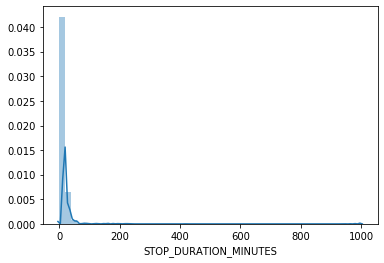

In [22]:
sns.distplot(unclean_df.STOP_DURATION_MINUTES) # also very skewed

In [23]:
unclean_df.OFFICER_EXPLAINED_STOP_FLAG.value_counts() # very lopsided, could complicate cross-validation

Y    10865
N      143
Name: OFFICER_EXPLAINED_STOP_FLAG, dtype: int64

In [24]:
unclean_df.OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION.value_counts() # not so useful for modeling purposes

(null)                                                         10865
ARREST                                                             5
SUSPECT FLED                                                       3
NOT FEASIBLE DUE TO THE VIOLENT NATURE OF THE CRIME                3
ARRESTED                                                           3
                                                               ...  
SUBJECT FLED                                                       1
DIDN'T GET A CHANCE TO                                             1
STUDENT WAS NOT INFORMED UNTIL ARRIVAL OF 19PCT SCHOOL UNIT        1
C/W ACCUSED SUBJECT OF CRIME IN FRONT OF POLICE                    1
CROWD CONTROL AND SAFETY OF OFFICERS AND PUBLIC                    1
Name: OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION, Length: 124, dtype: int64

In [25]:
unclean_df.OTHER_PERSON_STOPPED_FLAG.value_counts()

N    6793
Y    4215
Name: OTHER_PERSON_STOPPED_FLAG, dtype: int64

In [26]:
unclean_df.SUSPECT_ARRESTED_FLAG.value_counts() # our response

N    7893
Y    3115
Name: SUSPECT_ARRESTED_FLAG, dtype: int64

In [27]:
unclean_df.SUSPECT_ARREST_OFFENSE.value_counts() # very sparse in some places

(null)                                         7893
CPW                                             569
ROBBERY                                         452
PETIT LARCENY                                   393
ASSAULT                                         360
CRIMINAL TRESPASS                               296
OTHER                                           236
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE     134
BURGLARY                                        132
GRAND LARCENY                                   120
CRIMINAL MISCHIEF                                83
MENACING                                         64
CRIMINAL POSSESSION OF MARIHUANA                 51
CPSP                                             39
UNAUTHORIZED USE OF A VEHICLE                    38
GRAND LARCENY AUTO                               29
CRIMINAL SALE OF CONTROLLED SUBSTANCE            28
MAKING GRAFFITI                                  18
RECKLESS ENDANGERMENT                            14
CRIMINAL POS

In [28]:
unclean_df.SUMMONS_ISSUED_FLAG.value_counts() # also very lopsided

N    10716
Y      292
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [29]:
unclean_df.SUMMONS_OFFENSE_DESCRIPTION.value_counts() # majority null; concerning

(null)                            10716
MARIJUANA POSSESSION                105
OTHER                                56
DISORDERLY CONDUCT                   43
TRESPASS, CRIMINAL 4                 22
KNIFE, UNLAWFUL POSSESSION           20
ADMIN CODE VIOL.(UNCLASSIFIED)       16
ADMIN CODE PUBLIC CONSUMPTION        15
TRANSIT RULES/REG., NYC              12
PARK RULES & REG. VIOLATION           2
LITTERING/DUMPING                     1
Name: SUMMONS_OFFENSE_DESCRIPTION, dtype: int64

In [30]:
unclean_df.OFFICER_IN_UNIFORM_FLAG.value_counts()

Y    8140
N    2868
Name: OFFICER_IN_UNIFORM_FLAG, dtype: int64

In [31]:
unclean_df.ID_CARD_IDENTIFIES_OFFICER_FLAG.value_counts() # not good, maybe too lopsided to be useful

(null)    10933
I            75
Name: ID_CARD_IDENTIFIES_OFFICER_FLAG, dtype: int64

In [32]:
unclean_df.SHIELD_IDENTIFIES_OFFICER_FLAG.value_counts() # not good; recall no need to encode (null) as new string

(null)    8402
S         2606
Name: SHIELD_IDENTIFIES_OFFICER_FLAG, dtype: int64

In [33]:
unclean_df.VERBAL_IDENTIFIES_OFFICER_FLAG.value_counts() # not good

(null)    8748
V         2260
Name: VERBAL_IDENTIFIES_OFFICER_FLAG, dtype: int64

In [51]:
unclean_df.FRISKED_FLAG.value_counts()

Y    6519
N    4489
Name: FRISKED_FLAG, dtype: int64

In [52]:
unclean_df.SEARCHED_FLAG.value_counts()

N    7340
Y    3668
Name: SEARCHED_FLAG, dtype: int64

In [53]:
unclean_df.OTHER_CONTRABAND_FLAG.value_counts()

N    10058
Y      950
Name: OTHER_CONTRABAND_FLAG, dtype: int64

In [54]:
unclean_df.FIREARM_FLAG.value_counts() # also lopsided

(null)    10685
Y           323
Name: FIREARM_FLAG, dtype: int64

In [55]:
unclean_df.KNIFE_CUTTER_FLAG.value_counts()

(null)    10457
Y           551
Name: KNIFE_CUTTER_FLAG, dtype: int64

In [56]:
unclean_df.OTHER_WEAPON_FLAG.value_counts()

(null)    10860
Y           148
Name: OTHER_WEAPON_FLAG, dtype: int64

In [57]:
unclean_df.WEAPON_FOUND_FLAG.value_counts()

N    10054
Y      954
Name: WEAPON_FOUND_FLAG, dtype: int64

In [58]:
unclean_df.PHYSICAL_FORCE_CEW_FLAG.value_counts() # probably too sparse

(null)    10990
Y            18
Name: PHYSICAL_FORCE_CEW_FLAG, dtype: int64

In [59]:
unclean_df.PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG.value_counts()

(null)    10565
Y           443
Name: PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG, dtype: int64

In [60]:
unclean_df.PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG.value_counts() # is not exactly equivalent to our response

(null)    9127
Y         1881
Name: PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG, dtype: int64

In [61]:
unclean_df.PHYSICAL_FORCE_OC_SPRAY_USED_FLAG.value_counts() # not usable

(null)    11007
Y             1
Name: PHYSICAL_FORCE_OC_SPRAY_USED_FLAG, dtype: int64

In [62]:
unclean_df.PHYSICAL_FORCE_OTHER_FLAG.value_counts() # maybe usable, but we don't know what this entails

(null)    10700
Y           308
Name: PHYSICAL_FORCE_OTHER_FLAG, dtype: int64

In [63]:
unclean_df.PHYSICAL_FORCE_RESTRAINT_USED_FLAG.value_counts()

(null)    10728
Y           280
Name: PHYSICAL_FORCE_RESTRAINT_USED_FLAG, dtype: int64

In [64]:
unclean_df.PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG.value_counts()

Y         9975
(null)    1033
Name: PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG, dtype: int64

In [65]:
unclean_df.PHYSICAL_FORCE_WEAPON_IMPACT_FLAG.value_counts() # not usable

(null)    11004
Y             4
Name: PHYSICAL_FORCE_WEAPON_IMPACT_FLAG, dtype: int64

In [66]:
unclean_df.BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG.value_counts() 

(null)    7859
Y         3149
Name: BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG, dtype: int64

In [67]:
unclean_df.BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG.value_counts()

(null)    10667
Y           341
Name: BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG, dtype: int64

In [68]:
unclean_df.SUSPECTS_ACTIONS_CASING_FLAG.value_counts()

(null)    10378
Y           630
Name: SUSPECTS_ACTIONS_CASING_FLAG, dtype: int64

In [69]:
unclean_df.SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG.value_counts()

(null)    9384
Y         1624
Name: SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG, dtype: int64

In [70]:
unclean_df.SUSPECTS_ACTIONS_DECRIPTION_FLAG.value_counts() # what does this mean?

Y         6470
(null)    4538
Name: SUSPECTS_ACTIONS_DECRIPTION_FLAG, dtype: int64

In [71]:
unclean_df.SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG.value_counts()

(null)    10818
Y           190
Name: SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG, dtype: int64

In [72]:
unclean_df.SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG.value_counts() # what does this mean?

(null)    10880
Y           128
Name: SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG, dtype: int64

In [73]:
unclean_df.SUSPECTS_ACTIONS_LOOKOUT_FLAG.value_counts() # don't know what this means

(null)    10774
Y           234
Name: SUSPECTS_ACTIONS_LOOKOUT_FLAG, dtype: int64

In [74]:
unclean_df.SUSPECTS_ACTIONS_OTHER_FLAG.value_counts() # don't know what this means

(null)    7799
Y         3209
Name: SUSPECTS_ACTIONS_OTHER_FLAG, dtype: int64

In [75]:
unclean_df.SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG.value_counts() # also difficult to interpret

(null)    6668
Y         4340
Name: SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG, dtype: int64

In [76]:
unclean_df.SEARCH_BASIS_ADMISSION_FLAG.value_counts()

(null)    10808
Y           200
Name: SEARCH_BASIS_ADMISSION_FLAG, dtype: int64

In [78]:
unclean_df.SEARCH_BASIS_CONSENT_FLAG.value_counts()

(null)    10287
Y           721
Name: SEARCH_BASIS_CONSENT_FLAG, dtype: int64

In [79]:
unclean_df.SEARCH_BASIS_HARD_OBJECT_FLAG.value_counts()

(null)    10387
Y           621
Name: SEARCH_BASIS_HARD_OBJECT_FLAG, dtype: int64

In [80]:
unclean_df.SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG.value_counts()

(null)    8848
Y         2160
Name: SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG, dtype: int64

In [81]:
unclean_df.SEARCH_BASIS_OTHER_FLAG.value_counts() # not sure what this means

(null)    10425
Y           583
Name: SEARCH_BASIS_OTHER_FLAG, dtype: int64

In [82]:
unclean_df.SEARCH_BASIS_OUTLINE_FLAG.value_counts()

(null)    10836
Y           172
Name: SEARCH_BASIS_OUTLINE_FLAG, dtype: int64

In [83]:
unclean_df.DEMEANOR_CODE.value_counts() # not useful

DE    9942
Name: DEMEANOR_CODE, dtype: int64

In [84]:
unclean_df.DEMEANOR_OF_PERSON_STOPPED.value_counts() # highly subjective, questionably useful

CALM                                  3020
NERVOUS                               1121
NORMAL                                 475
UPSET                                  436
COOPERATIVE                            373
                                      ... 
UNDERSTOOD WHY STOPPED                   1
VERY COMPLIANT, APPARENTLY HAPPY         1
CALM, WANTED TO LEAVE                    1
AGITATED AT FIRST FOLLOWED BY CALM       1
1                                        1
Name: DEMEANOR_OF_PERSON_STOPPED, Length: 1578, dtype: int64

In [85]:
unclean_df.SUSPECT_REPORTED_AGE.value_counts() # sparse with some strange entries like 1 and 2
# the largest category is (null), problematic

(null)    796
18        484
17        480
20        449
16        441
         ... 
87          1
5           1
2           1
1           1
79          1
Name: SUSPECT_REPORTED_AGE, Length: 76, dtype: int64

In [10]:
unclean_df.SUSPECT_REPORTED_AGE.replace('(null)', '-15', inplace = True)

In [15]:
unclean_df.SUSPECT_REPORTED_AGE = unclean_df.SUSPECT_REPORTED_AGE.astype(float)

In [24]:
cut_labels = ['unknown', '0_17', '18_30', 'over_30']
cut_bins = [-16, -1, 17, 30, 100]
unclean_df['age_bin'] = pd.cut(unclean_df.SUSPECT_REPORTED_AGE, bins = cut_bins, labels = cut_labels)

In [86]:
unclean_df.SUSPECT_SEX.value_counts() # will probably want to drop the null values
unclean_df = unclean_df[unclean_df['SUSPECT_SEX'] != '(null)']

MALE      9925
FEMALE    1014
(null)      69
Name: SUSPECT_SEX, dtype: int64

In [87]:
unclean_df.SUSPECT_RACE_DESCRIPTION.value_counts() # maybe not now
# but could consider factoring proportion of population somehow into the analysis

BLACK                             6241
WHITE HISPANIC                    2411
WHITE                             1074
BLACK HISPANIC                     978
ASIAN / PACIFIC ISLANDER           221
(null)                              67
AMERICAN INDIAN/ALASKAN NATIVE      16
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

In [88]:
unclean_df.SUSPECT_HEIGHT.value_counts() # will probably want to drop the nulls and convert to floats
# we need a few continuous numerical features after all

5.1       1372
5.8       1309
5.9       1205
5.7       1078
5.6        955
6          877
5.11       820
5.5        723
6.1        609
6.2        443
5.4        380
(null)     377
5.3        219
6.3        185
5.2        178
5           70
6.4         70
6.5         50
4.11        19
6.6         15
4.1         11
6.7          9
4.9          6
6.8          6
4.8          6
4.6          5
6.9          4
4.5          2
4            1
6.11         1
4.2          1
2.3          1
1.5          1
Name: SUSPECT_HEIGHT, dtype: int64

In [95]:
unclean_df = unclean_df[unclean_df['SUSPECT_HEIGHT'] != '(null)'] # drop (null) strings
unclean_df.SUSPECT_HEIGHT = unclean_df.SUSPECT_HEIGHT.astype(float) # convert to float

In [104]:
unclean_df.SUSPECT_HEIGHT

0        5.10
1        6.10
2        5.50
3        5.10
4        5.11
         ... 
11003    5.11
11004    5.10
11005    5.40
11006    5.40
11007    5.10
Name: SUSPECT_HEIGHT, Length: 10631, dtype: float64

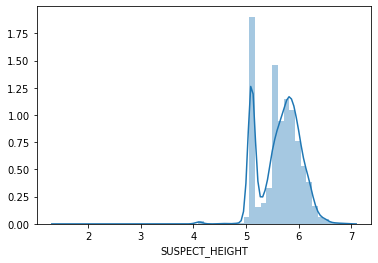

In [110]:
sns.distplot(unclean_df.SUSPECT_HEIGHT)

In [96]:
unclean_df.SUSPECT_WEIGHT.value_counts() # looks okay, need to convert to floats

150    1348
160    1287
180    1174
170     879
140     745
       ... 
184       1
204       1
132       1
131       1
201       1
Name: SUSPECT_WEIGHT, Length: 129, dtype: int64

In [106]:
unclean_df = unclean_df[unclean_df['SUSPECT_WEIGHT'] != '(null)'] # drop (null) strings
unclean_df.SUSPECT_WEIGHT = unclean_df.SUSPECT_WEIGHT.astype(float) # convert to float

In [107]:
unclean_df.SUSPECT_WEIGHT # since we have dropped a few rows, this will affect the counts above

0        170.0
1        250.0
2        150.0
3        160.0
4        230.0
         ...  
11003    170.0
11004    170.0
11005    140.0
11006    130.0
11007    145.0
Name: SUSPECT_WEIGHT, Length: 10474, dtype: float64

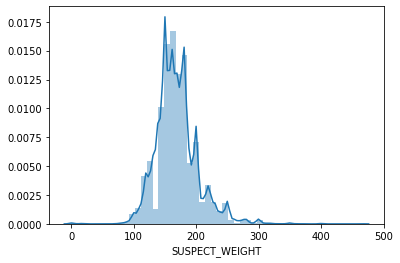

In [111]:
sns.distplot(unclean_df.SUSPECT_WEIGHT)

In [108]:
unclean_df.SUSPECT_BODY_BUILD_TYPE.value_counts() # don't know what all the categories mean

THN       5124
MED       3926
HEA       1018
U          318
(null)      56
XXX         32
Name: SUSPECT_BODY_BUILD_TYPE, dtype: int64

In [109]:
unclean_df.SUSPECT_EYE_COLOR.value_counts() # probably not important,
# but we can still throw it into the machine; some categories strange

BRO       8692
BLK        985
ZZZ        331
BLU        152
(null)     105
GRN         94
HAZ         89
GRY         20
MUL          5
OTH          1
Name: SUSPECT_EYE_COLOR, dtype: int64

In [112]:
unclean_df.SUSPECT_HAIR_COLOR.value_counts() # similar to eye color

BLK       7789
BRO       1308
BLD        489
XXX        288
GRY        237
BLN        174
(null)      57
RED         50
WHI         27
ZZZ         27
SDY         11
GRN          8
PNK          4
ORG          3
PLE          2
Name: SUSPECT_HAIR_COLOR, dtype: int64

In [113]:
unclean_df.SUSPECT_OTHER_DESCRIPTION.value_counts() # doesn't look useful

(null)                                             6072
NONE                                                285
UNK                                                 187
UNKNOWN                                             154
BEARD                                                59
                                                   ... 
JEANS / HOODED SWEATSHIRT                             1
BLUE SWEATER. BLACK PANTS, MULTI-COLOR SNEAKERS       1
WHITE SNEAKERS, BLUE JEANS, RED HOODIE,               1
LIGHT BLUE SHIRT                                      1
GLASSES, GOATEE                                       1
Name: SUSPECT_OTHER_DESCRIPTION, Length: 2310, dtype: int64

In [114]:
unclean_df.STOP_LOCATION_PRECINCT.value_counts() # will consider it,
# may use a different location variable due to how many categories this would generate

75     396
43     377
23     325
40     302
67     274
      ... 
68      48
50      42
123     36
17      29
22      23
Name: STOP_LOCATION_PRECINCT, Length: 77, dtype: int64

In [115]:
unclean_df.STOP_LOCATION_SECTOR_CODE.value_counts() # more sparse categories

C         2663
A         2480
B         2416
D         2069
E          323
H          104
G           87
(null)      71
F           70
K           52
I           51
J           47
M           31
N            9
1            1
Name: STOP_LOCATION_SECTOR_CODE, dtype: int64

In [116]:
unclean_df.STOP_LOCATION_APARTMENT.value_counts() # probably not useful

(null)         9847
LOBBY            37
1                33
2                21
BASEMENT         19
               ... 
2M                1
3N                1
8B                1
13C               1
COMM CENTER       1
Name: STOP_LOCATION_APARTMENT, Length: 246, dtype: int64

In [117]:
# may of the location variables were near unique so I am skipping over to zipcode
unclean_df.STOP_LOCATION_ZIP_CODE.value_counts() # not usable

(null)    10450
10504         2
11212         2
10006         2
10040         1
11221         1
10468         1
11104         1
11213         1
11215         1
11216         1
11225         1
10037         1
11232         1
11235         1
11416         1
10017         1
10019         1
10023         1
10029         1
10032         1
10458         1
Name: STOP_LOCATION_ZIP_CODE, dtype: int64

In [118]:
unclean_df.STOP_LOCATION_PATROL_BORO_NAME.value_counts() # looks good

PBBX    2213
PBMN    1727
PBBN    1717
PBBS    1707
PBMS     996
PBQN     945
PBQS     836
PBSI     333
Name: STOP_LOCATION_PATROL_BORO_NAME, dtype: int64

In [119]:
unclean_df.STOP_LOCATION_BORO_NAME.value_counts() # also looks good and easily interpretable

BROOKLYN         3424
MANHATTAN        2723
BRONX            2213
QUEENS           1781
STATEN ISLAND     333
Name: STOP_LOCATION_BORO_NAME, dtype: int64